<h1> Um Rede Neural para o problema XOR </h1>
<h2> Inicialmente importa a biblioteca tensorflow </h2> 

In [7]:
import tensorflow as tf
sess = tf.InteractiveSession()
print(tf.__version__) 

1.12.0


C:\Users\carlos\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<h2> Define as entradas e saídas </h2> 

In [8]:
# Desired input output mapping of XOR function:
x_ = [[0, 0], [0, 1], [1, 0], [1, 1]] # input
#labels=[0,      1,      1,      0]   # output =>
expect=[[1,0],  [0,1],  [0,1], [1,0]] # ONE HOT REPRESENTATION! 'class' [1,0]==0 [0,1]==1

<h2> Cria as variáveis da rede </h2> 

In [9]:
# x = tf.Variable(x_)
x = tf.placeholder("float", [None,2]) #  can we feed directly?
y_ = tf.placeholder("float", [None, 2]) # two output classes

number_hidden_nodes = 20 # 20 outputs to create some room for negatives and positives

W = tf.Variable(tf.random_uniform([2, number_hidden_nodes], -.01, .01))
b = tf.Variable(tf.random_uniform([number_hidden_nodes], -.01, .01))
hidden  = tf.nn.relu(tf.matmul(x,W) + b) # first layer.

 # the XOR function is the first nontrivial function, for which a two layer network is needed.
W2 = tf.Variable(tf.random_uniform([number_hidden_nodes,2], -.1, .1))
b2 = tf.Variable(tf.zeros([2]))
hidden2 = tf.matmul(hidden, W2)#+b2

y = tf.nn.softmax(hidden2)

<h2> Define loss e optmizer </h2> 

In [10]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

<h2> Executa fase de treinamento </h2> 

In [16]:
tf.initialize_all_variables().run()
list_train= []
for step in range(1000):
    feed_dict={x: x_, y_:expect } # feed the net with our inputs and desired outputs.
    error,a=sess.run([cross_entropy,train_step],feed_dict)
    if error < 0.1:break # early stopping yay
    list_train.append([step, error])
    print("step %d : entropy %.2f " % (step,error)) # error/loss should decrease over time

step 0 : entropy 2.77 
step 1 : entropy 2.77 
step 2 : entropy 2.77 
step 3 : entropy 2.77 
step 4 : entropy 2.77 
step 5 : entropy 2.77 
step 6 : entropy 2.77 
step 7 : entropy 2.77 
step 8 : entropy 2.77 
step 9 : entropy 2.77 
step 10 : entropy 2.77 
step 11 : entropy 2.77 
step 12 : entropy 2.77 
step 13 : entropy 2.76 
step 14 : entropy 2.76 
step 15 : entropy 2.76 
step 16 : entropy 2.76 
step 17 : entropy 2.76 
step 18 : entropy 2.75 
step 19 : entropy 2.75 
step 20 : entropy 2.74 
step 21 : entropy 2.74 
step 22 : entropy 2.73 
step 23 : entropy 2.73 
step 24 : entropy 2.72 
step 25 : entropy 2.71 
step 26 : entropy 2.70 
step 27 : entropy 2.68 
step 28 : entropy 2.67 
step 29 : entropy 2.64 
step 30 : entropy 2.64 
step 31 : entropy 2.60 
step 32 : entropy 2.60 
step 33 : entropy 2.53 
step 34 : entropy 2.51 
step 35 : entropy 2.48 
step 36 : entropy 2.45 
step 37 : entropy 2.36 
step 38 : entropy 2.31 
step 39 : entropy 2.27 
step 40 : entropy 2.21 
step 41 : entropy 2.20 
st

<h2> Plota gráfico da relação passo e entropia </h2>

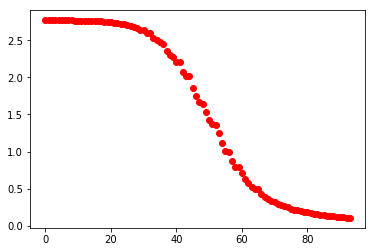

In [17]:
import matplotlib.pyplot as plt
import numpy as np
array_train = np.asarray(list_train)
#print(array_train)
plt.plot(array_train[:,0],array_train[:,1], 'ro')

<h2> Avalia treinamento realizado </h2> 

In [18]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # argmax along dim-1
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) # [True, False, True, True] -> [1,0,1,1] -> 0.75.

print("accuracy %s"%(accuracy.eval({x: x_, y_: expect})))

learned_output=tf.argmax(y,1)
print(learned_output.eval({x: x_}))

accuracy 1.0
[0 1 1 0]


In [20]:
print(accuracy)

Tensor("Mean_1:0", shape=(), dtype=float32)
